In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize':[18,6]})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from hsmmlearn.hsmm import GaussianHSMM
durations = np.array([
    [0.1, 0.0, 0.0, 0.9],
    [0.1, 0.0, 0.9, 0.0],
    [0.1, 0.9, 0.0, 0.0]
])
durations = np.zeros((3,40))
durations[0,-1] = 1
durations[1,-20] = 1
durations[2,-35] = 1
print(durations)

tmat = np.array([
    [0.7, 0.3, 0.0],
    [0.0, 0.7, 0.3],
    [0.3, 0.0, 0.7]
])

means = np.array([0.0, 5.0, 10.0])
scales = np.ones_like(means)/5
print(scales)
hsmm_1 = GaussianHSMM(
    means, scales, durations, tmat,
)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.2 0.2 0.2]


(1000,)


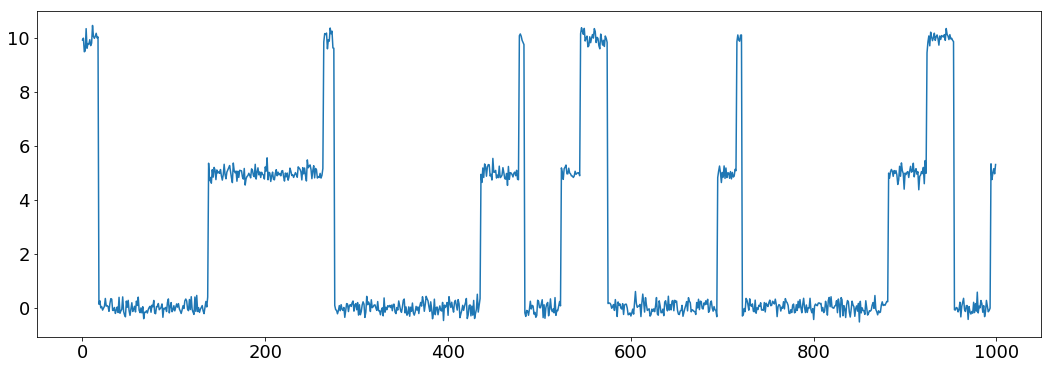

In [4]:
x_1 = hsmm_1.sample(1000)[0]
print(x_1.shape)
plt.plot(x_1)

In [5]:
from hsmmlearn.hsmm import GaussianHSMM
durations = np.array([
    [0.1, 0.0, 0.0, 0.9],
    [0.1, 0.0, 0.9, 0.0],
    [0.1, 0.9, 0.0, 0.0]
])
durations = np.zeros((3,40))
durations[0,-5] = 1
durations[1,-5] = 1
durations[2,-10] = 1
print(durations)


tmat = np.array([
    [0.7, 0.3, 0.0],
    [0.0, 0.7, 0.3],
    [0.3, 0.0, 0.7]
])

means = np.array([0.0, 5.0, 10.0])
scales = np.ones_like(means)/5
print(scales)
hsmm_2 = GaussianHSMM(
    means, scales, durations, tmat,
)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.2 0.2 0.2]


(1000,)


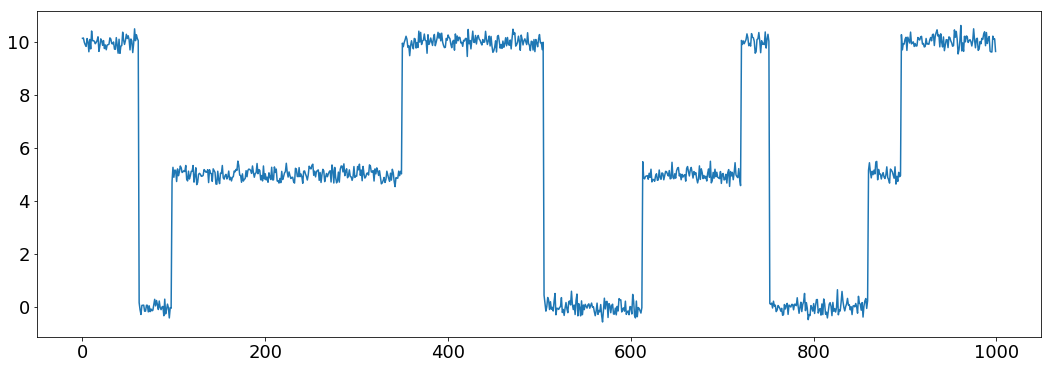

In [6]:
x_1 = hsmm_2.sample(1000)[0]
print(x_1.shape)
plt.plot(x_1)

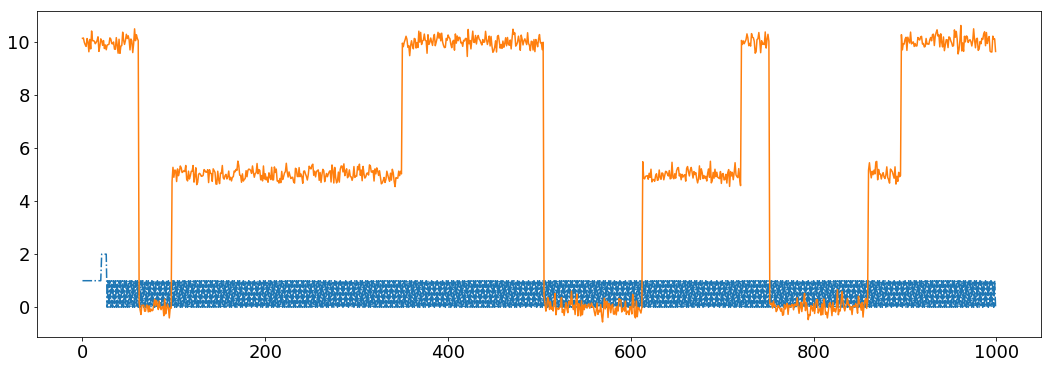

In [7]:
for m in (hsmm_1, hsmm_2):
    s = m.decode(x_1)
    plt.plot(s,'-.')
    break
plt.plot(x_1)

In [8]:
x_1.shape

(1000,)

In [9]:
ll = hsmm_1.emissions.likelihood(x_1)
ll.shape

(3, 1000)

In [10]:
ll.sum()

1391.0638151149735

In [11]:
ll = hsmm_2.emissions.likelihood(x_1)
ll.sum()

1391.0638151149735

In [12]:
hsmm_1.emissions.

SyntaxError: invalid syntax (<ipython-input-12-a2422f38cf63>, line 1)

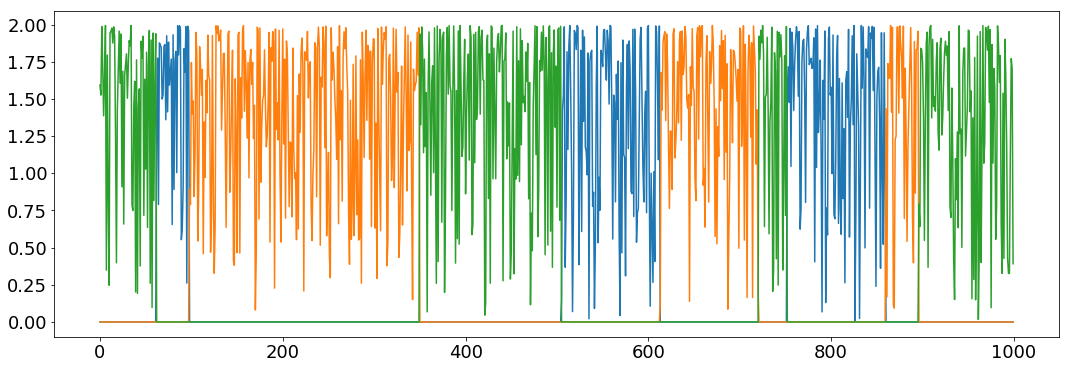

In [13]:
plt.plot(ll[0,:])
plt.plot(ll[1,:])
plt.plot(ll[2,:])